In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
import warnings
warnings.filterwarnings("ignore")
import arviz as az
from scipy.stats import pearsonr
from scipy.stats import spearmanr
%run -i '../../../miscellaneous/utils.py'

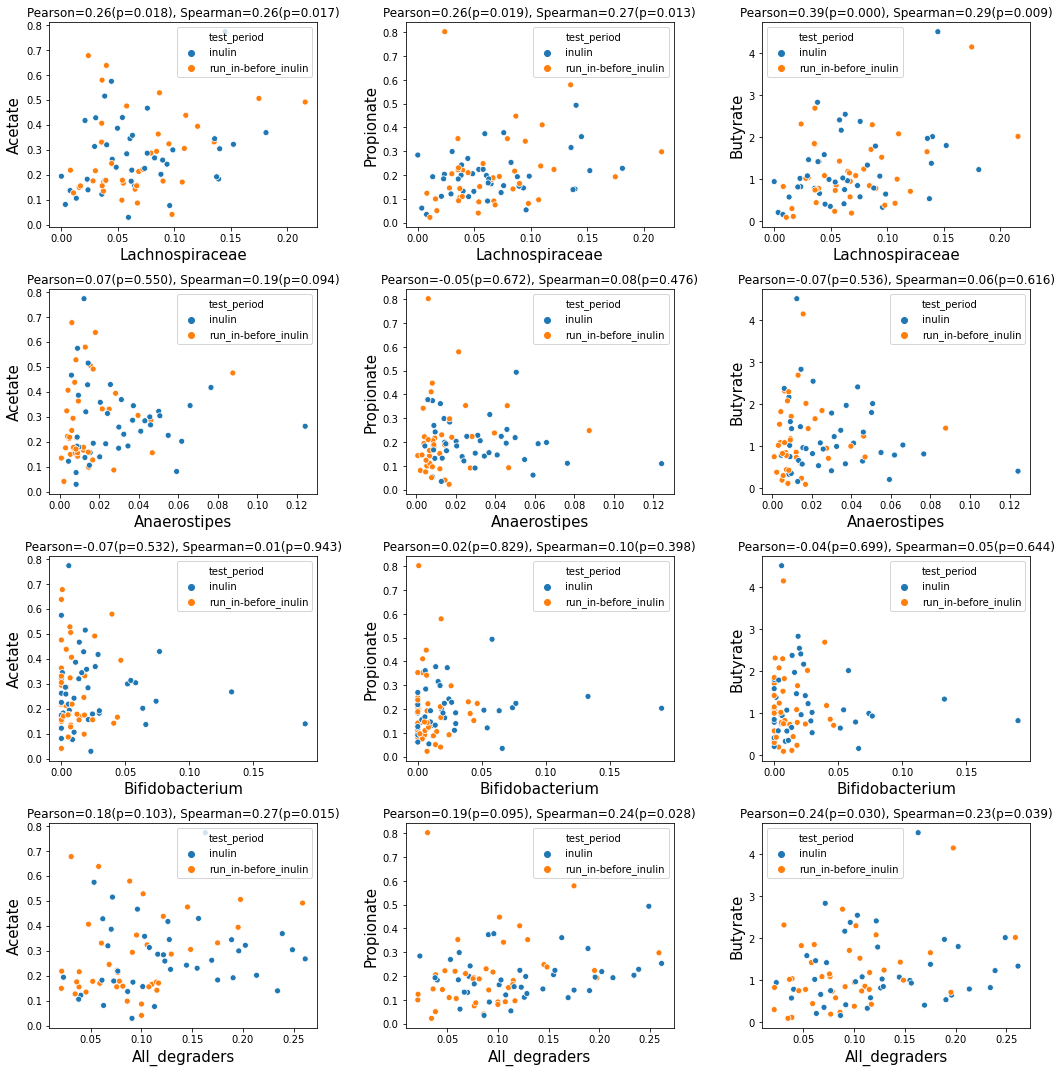

In [43]:
df_bac = pd.read_excel('16S_relative_abundance.xlsx', index_col=0)
df_meta = pd.read_csv('metadata.txt', sep='\t', skiprows=[1], index_col=0)
df_meta = df_meta[df_meta.test_period.str.contains('inulin')]

degraders = ['Lachnospiraceae','Anaerostipes','Bifidobacterium']
scfas = ['Acetate','Propionate','Butyrate']
df = pd.merge(df_bac[degraders], df_meta[scfas+['test_period']], left_index=True, right_index=True)
df['All_degraders'] = df[degraders].sum(axis=1)

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
for i,degrader in enumerate(degraders+['All_degraders']):
    for j,scfa in enumerate(scfas):
        _ = sns.scatterplot(x=degrader, y=scfa, data=df, ax=ax[i,j], hue='test_period')
        r1,p1 = pearsonr(df[degrader], df[scfa])
        r2,p2 = spearmanr(df[degrader], df[scfa])
        ax[i,j].set_title('Pearson=%2.2f(p=%2.3f), Spearman=%2.2f(p=%2.3f)'%(r1,p1,r2,p2))
        ax[i,j].xaxis.label.set_size(15)
        ax[i,j].yaxis.label.set_size(15)
        
plt.tight_layout()